<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Задача:" data-toc-modified-id="Задача:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача:</a></span></li><li><span><a href="#Техническое-задание:" data-toc-modified-id="Техническое-задание:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Техническое задание:</a></span></li><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных:</a></span></li><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Цель исследования</a></span></li></ul></li><li><span><a href="#Загрузка-библиотеки-и-файла-с-данными" data-toc-modified-id="Загрузка-библиотеки-и-файла-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотеки и файла с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#AB-тест" data-toc-modified-id="AB-тест-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AB тест</a></span><ul class="toc-item"><li><span><a href="#Результаты-АВ-теста:" data-toc-modified-id="Результаты-АВ-теста:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Результаты АВ-теста:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта

### Задача:

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.
- Оцените корректность проведения теста
- Проанализируйте результаты теста

Чтобы оценить корректность проведения теста, проверьте:

    - пересечение тестовой аудитории с конкурирующим тестом,
    - совпадение теста и маркетинговых событий, другие проблемы временны границ теста.

### Техническое задание:

- Название теста: `recommender_system_test` ;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:

    - конверсии в просмотр карточек товаров — событие `product_page` ,
    - просмотры корзины — `product_cart` ,
    - покупки — `purchase` .

### Описание данных:

**`ab_project_marketing_events.csv`** — календарь маркетинговых событий на 2020 год.<br>
Структура файла:
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.
<br>
<br>

**`final_ab_new_users.csv`** — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.<br>
Структура файла:
- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.
<br>
<br>

**`final_ab_events.csv`** — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.<br>
Структура файла:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок,
- `purchase`, в этом поле хранится стоимость покупки в долларах.
<br>
<br>

**`final_ab_participants.csv`** — таблица участников тестов.<br>
Структура файла:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

###  Цель исследования

Определить, улучшилась ли конверсия на 10% при каждом шаге после внедренеия новых рекомендательных систем.

## Загрузка библиотеки и файла с данными

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import plotly.express as px
import re
from datetime import datetime, timedelta
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
from plotly import graph_objects as go

In [2]:
from tqdm import tqdm

In [3]:
from matplotlib.dates import date2num

In [4]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# загрузка датасета
try:
    participants = pd.read_csv('final_ab_participants.csv')
    new_users = pd.read_csv('final_ab_new_users.csv')
    events = pd.read_csv('final_ab_events.csv')
    marketing_events = pd.read_csv('final_ab_marketing_events.csv')
    
except:
    participants = pd.read_csv('/datasets/final_ab_participants.csv')
    new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    events = pd.read_csv('/datasets/final_ab_events.csv')
    marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')

## Предобработка данных

Рассмотрим содержимое датасетов

In [6]:
datasets = [participants, new_users, events, marketing_events]
for i in datasets:
    display(i.head())
    display(i.info())
    display(i.describe().T)
    print('---')

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

,count,unique,top,freq
user_id,18268,16666,C93F18A3865E93D6,2
group,18268,2,A,9655
ab_test,18268,2,interface_eu_test,11567


---


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

,count,unique,top,freq
user_id,61733,61733,8B7EBD3D8CF61A25,1
first_date,61733,17,2020-12-21,6290
region,61733,4,EU,46270
device,61733,4,Android,27520


---


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

,count,mean,std,min,25%,50%,75%,max
details,"62,740.00",23.88,72.18,4.99,4.99,4.99,9.99,499.99


---


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

,count,unique,top,freq
name,14,14,4th of July Promo,1
regions,14,6,APAC,4
start_dt,14,14,2020-12-30,1
finish_dt,14,14,2020-04-19,1


---


Пропуски в датасетах отсутствуют.

Переведем даты в формат datetime.

In [7]:
new_users['first_date'] = new_users['first_date'].map(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))
events['event_dt'] = events['event_dt'].map(
    lambda x: pd.Timestamp(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()))

In [8]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


Проверим, не было ли пересечений участников теста с другими тестами.

In [10]:
participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [11]:
(
    participants.groupby('user_id', as_index=False)['ab_test']
    .count().groupby('ab_test', as_index=False)['user_id'].count()
)

,ab_test,user_id
0,1,15064
1,2,1602


In [12]:
participants[participants['ab_test']=='recommender_system_test']['user_id'].count()

6701

Почти четверть всех пользователей участвовала в 2х тестах сразу.

In [13]:
participants_check = participants.merge(participants
                                        .groupby('user_id', as_index=False)['ab_test']
                                        .count(),on='user_id')
participants_check[(participants_check['ab_test_x']=='recommender_system_test')&
                  (participants_check['ab_test_y']==2)].groupby('group')['user_id'].count()

group
A    921
B    681
Name: user_id, dtype: int64

In [14]:
participants_check = (
    participants_check[(participants_check['ab_test_x']=='recommender_system_test')&
                       (participants_check['ab_test_y']==2)]
    .drop(['ab_test_x', 'group'], axis=1)
    .rename(columns={'ab_test_y':'ab_count'})
    .merge(participants[participants['ab_test']=='recommender_system_test'], on='user_id', how='left')
    .merge(participants[participants['ab_test']=='interface_eu_test'], on='user_id', how='left')
)
participants_check['group'] = participants_check['group_x']+participants_check['group_y']

In [15]:
participants_check.groupby('group')['user_id'].count()

group
AA    482
AB    439
BA    337
BB    344
Name: user_id, dtype: int64

Распределение в группы А и В пользователей попавших в 2 теста совпадает пол количеству с распределением по группам, так же попадание в группы А и В сопадает. С учетом того, что данных пользователей четверть, при этом распределение по группам с 2 тестами, попадание в группу В второго теста по количетсву сопадает с рапределением по группам нашего теста в целом, оставим группы без изменений.

Оставим только пользователей участников теста.

In [16]:
participants = participants[participants['ab_test']=='recommender_system_test']
participants.shape[0]

6701

Проверим сколько пользователей из региона EU. 

In [17]:
participants[participants['user_id'].isin(new_users[new_users['region']=='EU']['user_id'])].shape[0]

6351

Оставим только данных пользователей и проверим составляют ли они 15% от пользователей из региона EU.

In [18]:
participants = participants[participants['user_id'].isin(
    new_users[new_users['region']=='EU']['user_id'])]
participants.shape[0]/new_users[new_users['region']=='EU'].shape[0]*100

13.725956343202938

13.7% близко к ТЗ.

Проверим не попадают ли пользователи в обе группы АВ теста.

In [19]:
(
    participants[participants['group'] == 'A'][['user_id','group']]
    .merge(participants[participants['group'] == 'B'][['user_id','group']],
           on='user_id')
).drop_duplicates(subset='user_id').shape[0]

0

Пользователи разделены корректно.

Проверим как разбиты пользователи по группам.

In [20]:
print(participants[participants['group']=='A'].shape[0],
      participants[participants['group']=='B'].shape[0])

3634 2717


В целом количество пользователей в группах достаточно равномерное.

Очистим остальные датафреймы от пользователей не входящих в тестовую.

In [21]:
new_users=new_users[new_users['user_id'].isin(participants['user_id'])]

In [22]:
events = events[events['user_id'].isin(participants['user_id'])]

Рассмотрим даты проведения теста и выгрузки данных.

In [23]:
events['event_dt'].max()

Timestamp('2020-12-30 00:00:00')

In [24]:
events['event_dt'].max() - timedelta(days=14)

Timestamp('2020-12-16 00:00:00')

По условиям задания, необходимо проверить конверсию пользователей в первые 14 дней, однако тест завершился раньше, чем прошло 14 дней для пользователей, которые зарегистрировались после 16 декабря. Рассмотрим сколько таких пользователей.

In [25]:
new_users[(new_users['first_date']>(events['event_dt'].max() - timedelta(days=14)))]['user_id'].nunique()

2265

Таких пользователей >35% от общего числа пользователей. Удалив, сильно сократим выборку и внесем ошибку в тест.

Рассмотрим маркетинговые компании, чтобы оценить влияние на пользователей.

In [26]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


В период теста проводилась компания к Рождеству и Новому году и он занимает 6 дней из нашнего 24 дневного теста, то есть почти четверть дней. Удалять такой массив информации будет некорректно.

Проверим сколько событий произошло после 14 с даты регистрации пользователей.

In [27]:
date_check = events.merge(new_users, left_on='user_id', right_on='user_id', how='left')
print(date_check.shape[0])
date_check[date_check['event_dt'] <= (date_check['first_date'] + timedelta(days=14))].shape[0]

23420


22828

Всего 600 записей. Удалим данные события из датасета events.

In [28]:
events = date_check[date_check['event_dt'] <= (date_check['first_date'] + timedelta(days=14))]

Добавим к таблице с событиями группа теста, к которой относится участник.

In [29]:
events = events.merge(participants,
                      on = 'user_id',
                      how = 'left').drop(['region', 'ab_test'], axis=1)

Рассмотрим распределение в процентом соотношении количества собитый по пользователям в выборках.

In [30]:
event_per_user_A = (events[events['group']=='A'].groupby('user_id',as_index=False)['event_name']
            .count().groupby('event_name',as_index=False)['user_id'].count())
event_per_user_A['user_id'] = event_per_user_A['user_id']/(event_per_user_A['user_id'].sum())*100

In [31]:
event_per_user_B = (events[events['group']=='B'].groupby('user_id',as_index=False)['event_name']
            .count().groupby('event_name',as_index=False)['user_id'].count())
event_per_user_B['user_id'] = event_per_user_B['user_id']/(event_per_user_B['user_id'].sum())*100

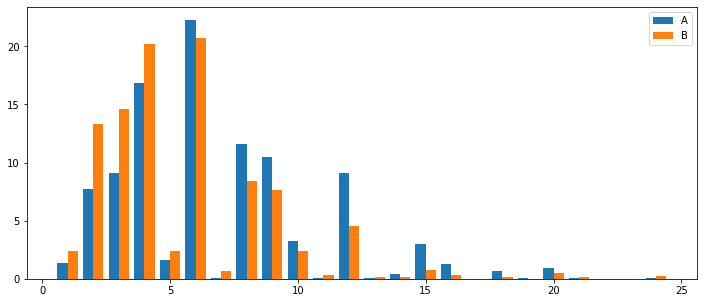

In [32]:
fig = plt.figure(figsize=(12,5))
plt.bar(event_per_user_A['event_name']-0.2, 
        event_per_user_A['user_id'], width=0.4, label='A',align='center')
plt.bar(event_per_user_B['event_name']+0.2, 
        event_per_user_B['user_id'], width=0.4, label='B',align='center')
plt.legend()
plt.show()

Из графика распределения видно, что в группе А больше пользователей в % соотношении совершают более 5 действий, данный факт должен найти свое отражение в лучшей конверсии.

Рассмотрим распределение в процентом соотношении количества собитый по дням в выборках.

In [33]:
event_per_day_A = events[events['group']=='A'].groupby('event_dt',as_index=False)['event_name'].count()
event_per_day_A['event_name']=event_per_day_A['event_name']/event_per_day_A['event_name'].sum()*100

In [34]:
event_per_day_B = events[events['group']=='B'].groupby('event_dt',as_index=False)['event_name'].count()
event_per_day_B['event_name']=event_per_day_B['event_name']/event_per_day_B['event_name'].sum()*100

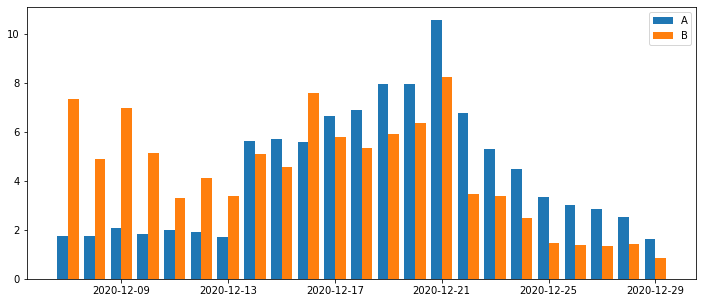

In [35]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(date2num(event_per_day_A['event_dt'])-0.2,
       event_per_day_A['event_name'], width=0.4, label='A',align='center')
ax.bar(date2num(event_per_day_B['event_dt'])+0.2,
       event_per_day_B['event_name'], width=0.4, label='B',align='center')
ax.legend()
ax.xaxis_date()
plt.show()

Из графика распределения видно, что в группе В больше пользователей в % соотношении совершают действия в начале исследования, после 13 декабря виден резкий скачок в группе А и далее, как правило, пользователи этой группы и совершают больше всего действий. Скорее всего движений пользователей по воронке в группе В должно быть меньше

Проверим переходы пользователей по воронке.

In [36]:
events.groupby('event_name')['user_id'].count().reindex(['login', 'product_page', 'product_cart', 'purchase'])

event_name
login           10313
product_page     6382
product_cart     3010
purchase         3123
Name: user_id, dtype: int64

Странная картина, посещений корзины меньше, чем покупок. Возможно, здесь работает меню быстрой покупки без посещения корзины. При проведении АВ теста будет использовать общую конверсию для каждого шага.

Построим графики воронок по группам.

In [37]:
funnel = events.groupby('event_name')['user_id'].count()
funnel = funnel.reindex(['login', 'product_page', 'product_cart', 'purchase'])
funnel = pd.DataFrame({'step':['login', 'product_page', 'product_cart', 'purchase']}, funnel).reset_index()
funnel['user_id']=funnel['user_id'] / funnel.loc[0,'user_id']*100

In [38]:
funnel_A = events[events['group']=='A'].groupby('event_name')['user_id'].count()
funnel_A = funnel_A.reindex(['login', 'product_page', 'product_cart', 'purchase'])
funnel_A = pd.DataFrame({'step':['login', 'product_page', 'product_cart', 'purchase']}, funnel_A).reset_index()
funnel_A['user_id']=funnel_A['user_id'] / funnel_A.loc[0,'user_id']*100

In [39]:
funnel_B = events[events['group']=='B'].groupby('event_name')['user_id'].count()
funnel_B = funnel_B.reindex(['login', 'product_page', 'product_cart', 'purchase'])
funnel_B = pd.DataFrame({'step':['login', 'product_page', 'product_cart', 'purchase']}, funnel_B).reset_index()
funnel_B['user_id']=funnel_B['user_id'] / funnel_B.loc[0,'user_id']*100

In [40]:
#напишем функцию для построения графиков
def plot(data, x, y, xlim):
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x=x, y=y, 
                data= data,
                label="Total")

    ax.set(xlim=(0, xlim), ylabel="")
    sns.despine(left=True, bottom=True)

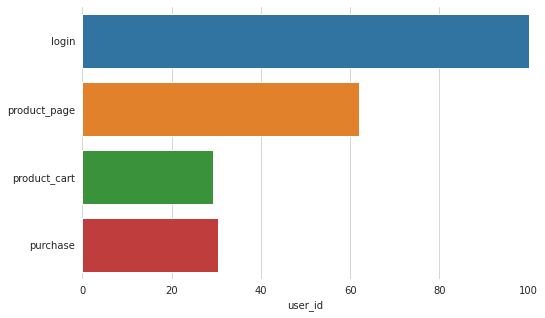

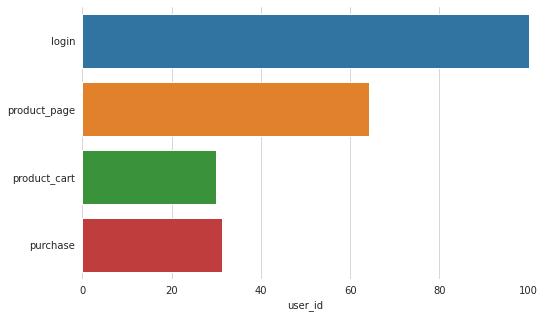

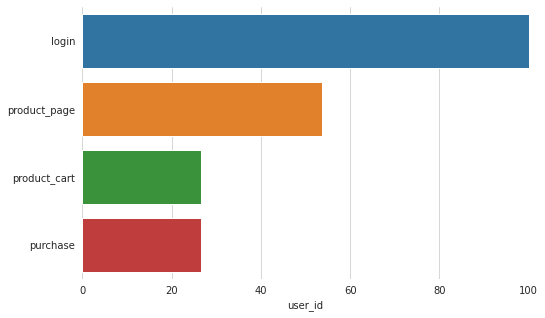

In [41]:
for i in [funnel,funnel_A,funnel_B]:
    plot(i,'user_id', 'step', 100)

Графики конверсий подтверждают наши предположения по предыдущим графикам, конверсия пользователей в группе А заметно выше на этапе перехода к странице товара, и так же лучше на этапе перехода к корзине и покупке.

Данные подготовлены и проверены, можно начинать тест.

##  AB тест

Подготовим функцию для АB теста.

In [42]:
def a_b_test (result, appear, alpha):
    print(f'Конверсия из {appear} в {result}')
    #p-value z-теста
    p_value = proportions_ztest(
            [
                events[(events['group']=='A')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum(),
                events[(events['group']=='B')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum()
            ],
            [
                events[(events['group']=='A')&(events['event_name']==appear)].groupby('user_id')['event_name'].nunique().sum(),
                events[(events['group']=='B')&(events['event_name']==appear)].groupby('user_id')['event_name'].nunique().sum()
            ]
        )[1]
    print(f'p-значение: {p_value:.5f}')
    #сравнение p-value с заданным уровнем значимости
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
    #конверсия групп
    p1 = (events[(events['group']=='A')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum()
          /events[(events['group']=='A')&(events['event_name']==appear)].groupby('user_id')['event_name'].nunique().sum())
    
    p2 = (events[(events['group']=='B')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum()
          /events[(events['group']=='B')&(events['event_name']==appear)].groupby('user_id')['event_name'].nunique().sum())
    
    #число пользователей групп
    p1_numbers=events[(events['group']=='A')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum()
    p2_numbers=events[(events['group']=='B')&(events['event_name']==result)].groupby('user_id')['event_name'].nunique().sum()  
    
    print(f'Конверсия группы A - {p1:.1%}; B - {p2:.1%}')    
    print(f'Число пользователей группы A - {p1_numbers:.0f}; B - {p2_numbers:.0f}')
    print()

Проведем AB тесты по воронкам. Нулевой гипотезой будет отсутствие статистически значимой разницы между пользователями, альтернативная гипотеза - между долями есть значимая разница.

In [43]:
a_b_test('product_page', 'login', 0.05)

Конверсия из login в product_page
p-значение: 0.00001
Отвергаем нулевую гипотезу: между долями есть значимая разница
Конверсия группы A - 64.7%; B - 56.3%
Число пользователей группы A - 1685; B - 493



In [44]:
a_b_test('product_cart', 'login', 0.05)

Конверсия из login в product_cart
p-значение: 0.22159
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Конверсия группы A - 30.0%; B - 27.9%
Число пользователей группы A - 782; B - 244



In [45]:
a_b_test('purchase', 'login', 0.05)

Конверсия из login в purchase
p-значение: 0.04865
Отвергаем нулевую гипотезу: между долями есть значимая разница
Конверсия группы A - 32.0%; B - 28.4%
Число пользователей группы A - 833; B - 249



### Результаты АВ-теста:

- при переходе от авторизации к странице продукта получили обратный ожидаемому эффект снижение конверсии на 8% со статистически значимыми различиями;
- конверсия к корзине тоже не достигла ожидаемого роста в 10%, получили снижение на 2%, однако статистически значимного различия не получили;
- конверсия из авторизации в покупку снизилась почти на 3,5% со статистически значимыми различиями;
- с учетом всех полученных данных результатам исследования данных, результатам теста в целом можно доверять;
- с учетом полученных результатов необходимо остановить тест и откатиться к прежнему варианту.

## Выводы

- выполнен импорт необходимых инструментов и загрузка датасетов для анализа;
- выполнен перевод данных в корректный формат;
- выполнена проверка пользователей на попадание в обе группы;
- выполнена проверка дат проведения теста и соответствие ТЗ - действия в первые 14 дней;
- обнаружена ошибка - остановка сбора данных произошла раньше, чем указано в ТЗ, 6 дней могли внести существенные изменения, в результате в статистику попали пользователи, которые не "получили" 14 дней на действия, однако таких пользователей было почти 35%, удалять их было некорректно с точки зрения качества статистических данных;
- окончание теста совпадало с началом Рождественских и Новогодних акций;
- при построении воронки обнаружена аномалия - посещений корзины меньше, чем покупок. Возможно, здесь работает меню быстрой покупки без посещения корзины. При проведении АВ теста будет использовалась общая конверсию для каждого шага;
- из графика распределения количества действий по пользователям видно, что в группе А больше пользователей в % соотношении совершают более 5 действий, данный факт отражается на конверсии;
- из графика распределения действий по дням видно, что в группе В больше пользователей в % соотношении совершают действия в начале исследования, после 13 декабря виден резкий скачок в группе А и далее, как правило, пользователи этой группы и совершают больше всего действий. Скорее всего движений пользователей по воронке в группе В должно быть меньше;
- графики конверсий подтвердили наши предположения по графикам распределения действий по дням и пользователям, конверсия пользователей в группе А заметно выше на этапе перехода к странице товара, и так же лучше на этапе перехода к корзине и покупке.

- **Результаты АВ-теста:**
    - при переходе от авторизации к странице продукта получили обратный ожидаемому эффект снижение конверсии на 8% со статистически значимыми различиями;
    - конверсия к корзине тоже не достигла ожидаемого роста в 10%, получили снижение на 2%, однако статистически значимного различия не получили;
    - конверсия из авторизации в покупку снизилась почти на 3,5% со статистически значимыми различиями;
    - с учетом всех полученных данных результатам исследования данных, результатам теста в целом можно доверять;
    - с учетом полученных результатов необходимо остановить тест и откатиться к прежнему варианту;
    
- **Рекомендации:**
    - уделить внимание качеству сбора данных и не прерывать сбор данных раньше обозначенных в ТЗ;
    - проверять корректности ожидаемой воронки и при возможности совершения действия в обход одного из участков воронки - указывать это в задании;
    - с учетом полученных результатов необходимо остановить тест и откатиться к прежнему варианту рекомендаций.